In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates

In [ ]:
# Fetch data
data = yf.download(['^VIX', 'SPY'], start='2013-01-01', end='2023-12-31')['Adj Close']

# Calculate Moving Averages for VIX
data['MA50_VIX'] = data['^VIX'].rolling(window=50).mean()
data['MA100_VIX'] = data['^VIX'].rolling(window=100).mean()

# Calculate RSI for SPY
delta = data['SPY'].diff()
gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
rs = gain / loss
data['RSI'] = 100 - (100 / (1 + rs))

# Calculate MACD for SPY
exp1 = data['SPY'].ewm(span=12, adjust=False).mean()
exp2 = data['SPY'].ewm(span=26, adjust=False).mean()
data['MACD'] = exp1 - exp2
data['Signal_Line'] = data['MACD'].ewm(span=9, adjust=False).mean()

# Define buffer for VIX crossover
buffer = 0.03  # 3%
data['crossover'] = np.where(data['MA50_VIX'] > (1 + buffer) * data['MA100_VIX'], 1,
                             np.where(data['MA50_VIX'] < (1 - buffer) * data['MA100_VIX'], -1, 0))

# Incorporate RSI and MACD into signals
data['RSI_signal'] = np.where(data['RSI'] > 70, -1, np.where(data['RSI'] < 30, 1, 0))
data['MACD_signal'] = np.where(data['MACD'] > data['Signal_Line'], 1, -1)

# Combine signals to create 'final_signal'
data['combined_signal'] = data['crossover'] + data['RSI_signal'] + data['MACD_signal']
data['final_signal'] = np.where(data['combined_signal'] > 0, 1, np.where(data['combined_signal'] < 0, -1, 0))

# # Debugging: Check if 'final_signal' is being created
print(data[['final_signal']].tail())  # Confirm 'final_signal' exists



[*********************100%%**********************]  2 of 2 completed

Ticker      final_signal
Date                    
2023-12-22             0
2023-12-26            -1
2023-12-27            -1
2023-12-28            -1
2023-12-29            -1


[*********************100%%**********************]  12 of 12 completed


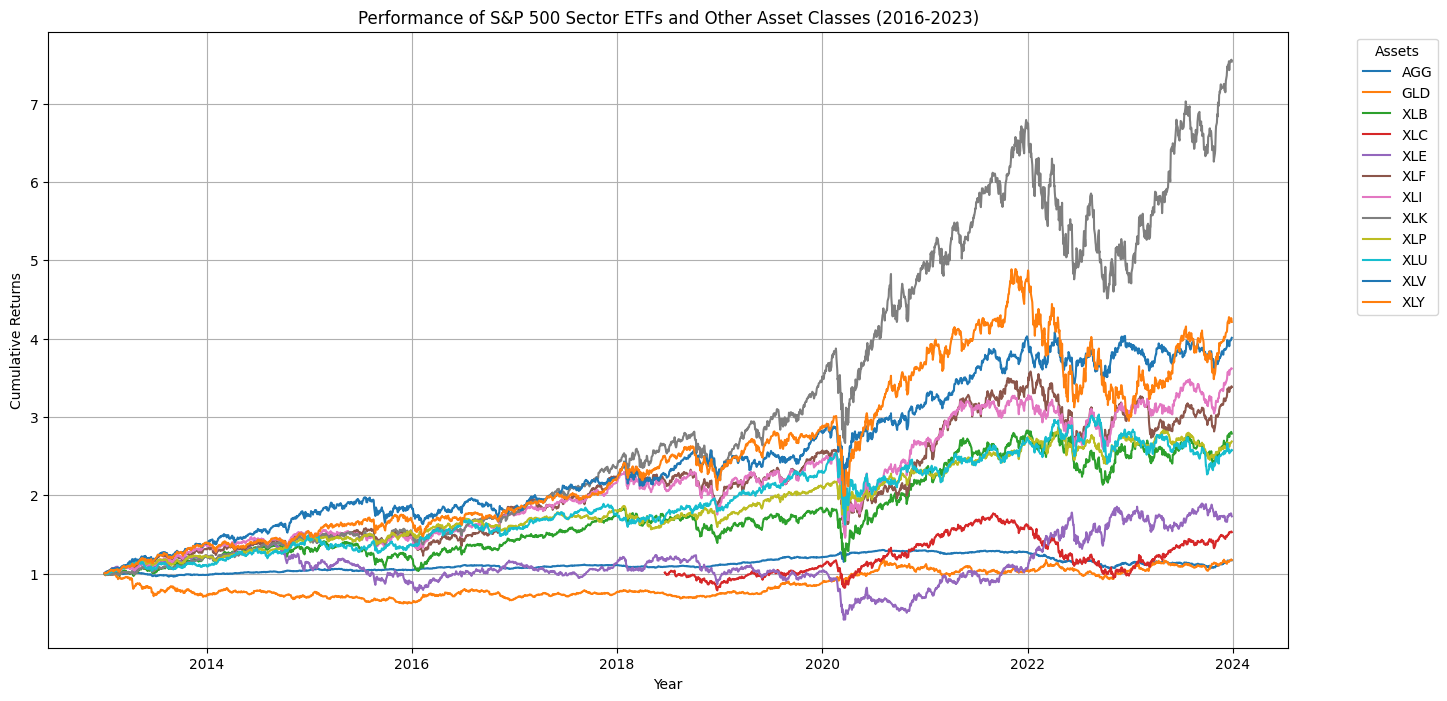

In [ ]:
# Define the tickers, including the new asset classes
assets = {
    'Communication Services': 'XLC',
    'Consumer Discretionary': 'XLY',
    'Consumer Staples': 'XLP',
    'Energy': 'XLE',
    'Financials': 'XLF',
    'Health Care': 'XLV',
    'Industrials': 'XLI',
    'Materials': 'XLB',
    'Technology': 'XLK',
    'Utilities': 'XLU',
    'Gold': 'GLD',
    'Bonds': 'AGG'
}

# Download historical data
data = yf.download(list(assets.values()), start='2013-01-01', end='2023-12-31')['Adj Close']

# Calculate cumulative returns
cumulative_returns = (data.pct_change() + 1).cumprod()

# Plot the data
plt.figure(figsize=(16, 8))
for column in cumulative_returns.columns:
    plt.plot(cumulative_returns.index, cumulative_returns[column], label=column)

plt.title('Performance of S&P 500 Sector ETFs and Other Asset Classes (2016-2023)')
plt.xlabel('Year')
plt.ylabel('Cumulative Returns')
plt.legend(title='Assets', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


In [ ]:
# Test iteration over the Series
for date, signal in data['final_signal'].items():
    print(date, signal)


2013-01-02 00:00:00 -1
2013-01-03 00:00:00 -1
2013-01-04 00:00:00 1
2013-01-07 00:00:00 -1
2013-01-08 00:00:00 -1
2013-01-09 00:00:00 -1
2013-01-10 00:00:00 1
2013-01-11 00:00:00 1
2013-01-14 00:00:00 1
2013-01-15 00:00:00 1
2013-01-16 00:00:00 1
2013-01-17 00:00:00 1
2013-01-18 00:00:00 1
2013-01-22 00:00:00 0
2013-01-23 00:00:00 0
2013-01-24 00:00:00 0
2013-01-25 00:00:00 0
2013-01-28 00:00:00 0
2013-01-29 00:00:00 0
2013-01-30 00:00:00 0
2013-01-31 00:00:00 0
2013-02-01 00:00:00 0
2013-02-04 00:00:00 1
2013-02-05 00:00:00 0
2013-02-06 00:00:00 0
2013-02-07 00:00:00 1
2013-02-08 00:00:00 1
2013-02-11 00:00:00 1
2013-02-12 00:00:00 1
2013-02-13 00:00:00 1
2013-02-14 00:00:00 1
2013-02-15 00:00:00 1
2013-02-19 00:00:00 1
2013-02-20 00:00:00 -1
2013-02-21 00:00:00 -1
2013-02-22 00:00:00 -1
2013-02-25 00:00:00 -1
2013-02-26 00:00:00 -1
2013-02-27 00:00:00 -1
2013-02-28 00:00:00 -1
2013-03-01 00:00:00 -1
2013-03-04 00:00:00 -1
2013-03-05 00:00:00 1
2013-03-06 00:00:00 1
2013-03-07 00:00:0

[*********************100%%**********************]  13 of 13 completed


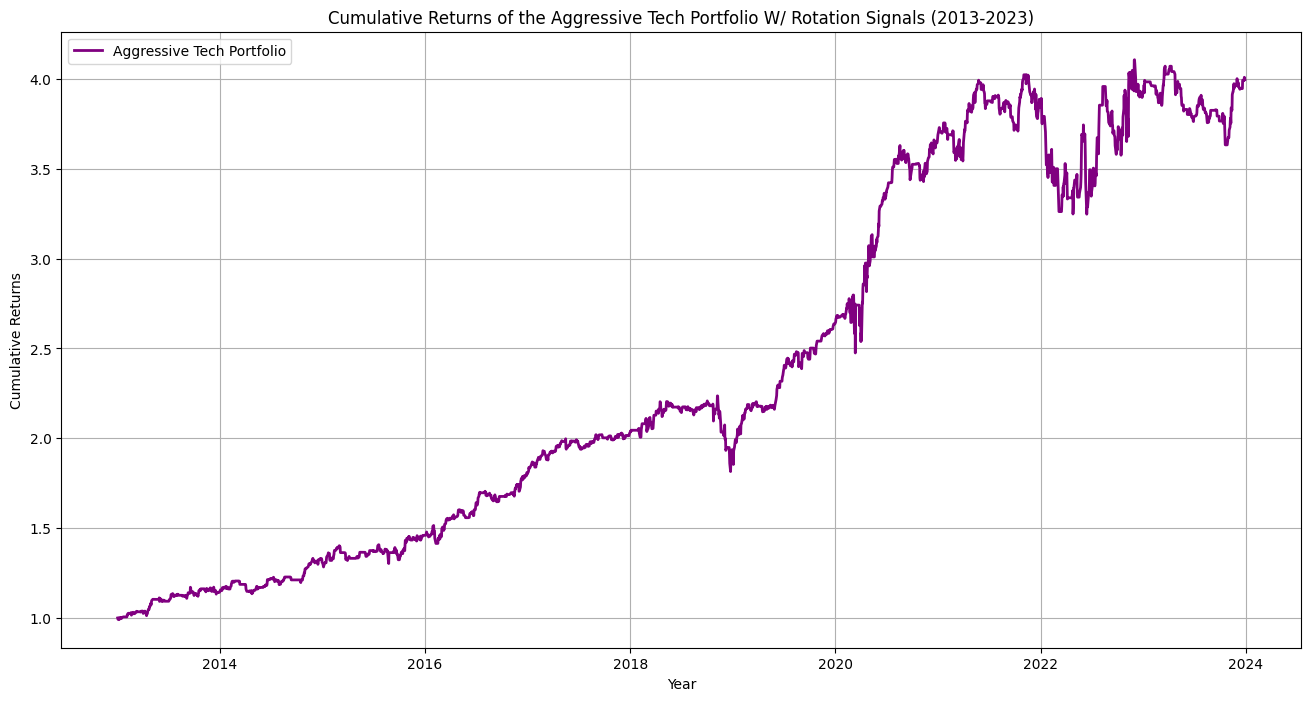

In [ ]:
# Define the tickers for the assets
assets = {
    'S&P': 'SPY',
    'Communication Services': 'XLC',
    'Consumer Discretionary': 'XLY',
    'Consumer Staples': 'XLP',
    'Energy': 'XLE',
    'Financials': 'XLF',
    'Health Care': 'XLV',
    'Industrials': 'XLI',
    'Materials': 'XLB',
    'Technology': 'XLK',
    'Utilities': 'XLU',
    'Gold': 'GLD',
    'Bonds': 'AGG',
}

# Download historical data for the assets
asset_data = yf.download(list(assets.values()), start='2013-01-01', end='2023-12-31')['Adj Close']

# Initialize the AggressiveTechPortfolio with zero exposure initially
AggressiveTechPortfolio = pd.DataFrame(index=asset_data.index, columns=asset_data.columns)
AggressiveTechPortfolio[:] = 0

# Adjusted bullish weights for a more aggressive investment strategy
bullish_weights = {
    'XLC': 0.0,  # Slightly increase for exposure to communication services
    'XLY': 0.2,  # Major weight to consumer discretionary
    'XLK': 0.7,  # Significantly increased weight for technology
    'XLF': 0.1,  # Increase for financials
    'XLI': 0.0,  # Industrial exposure
    'XLB': 0.0,  # Some exposure to materials
    'XLP': 0, 'XLU': 0, 'XLV': 0, 'GLD': 0, 'AGG': 0,  # Zero-weight defensive assets
}

# Define bearish and neutral weights if needed
bearish_weights = {
    'XLU': 0.05, 'XLP': 0.15, 'XLV': 0.15, 'GLD': 0.55, 'AGG': 0.1
    , 'XLB': 0, 'XLI': 0, 'XLF': 0, 'XLC': 0, 'XLY': 0, 'XLK': 0
}

neutral_weights = {ticker: 1/len(assets) for ticker in assets if assets[ticker] not in ['GLD', 'AGG']}

# Portfolio allocation based on signals
for date, signal in data['final_signal'].items():
    if signal == 1:  # Bullish signal
        for asset, weight in bullish_weights.items():
            AggressiveTechPortfolio.loc[date, asset] = weight
    elif signal == -1:  # Bearish signal
        for asset, weight in bearish_weights.items():
            AggressiveTechPortfolio.loc[date, asset] = weight
    else:  # Neutral signal
        for asset, weight in neutral_weights.items():
            AggressiveTechPortfolio.loc[date, asset] = weight

# Calculate daily and cumulative returns
AggressiveTechPortfolio_returns = (AggressiveTechPortfolio.shift() * asset_data.pct_change()).sum(axis=1)
AggressiveTechPortfolio_cumulative_returns = (1 + AggressiveTechPortfolio_returns).cumprod()

# Plot the performance of the AggressiveTechPortfolio
plt.figure(figsize=(16, 8))
plt.plot(AggressiveTechPortfolio_cumulative_returns.index, AggressiveTechPortfolio_cumulative_returns, label='Aggressive Tech Portfolio', color='purple', linewidth=2)
plt.title('Cumulative Returns of the Aggressive Tech Portfolio W/ Rotation Signals (2013-2023)')
plt.xlabel('Year')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Calculate the annual return for the Aggressive Tech Portfolio
annual_return_aggressive_tech = AggressiveTechPortfolio_returns.mean() * 252

# Calculate the annual volatility
annual_volatility_aggressive_tech = AggressiveTechPortfolio_returns.std() * np.sqrt(252)

# Calculate the Sharpe Ratio, assuming a risk-free rate of 0% for simplicity
sharpe_ratio_aggressive_tech = annual_return_aggressive_tech / annual_volatility_aggressive_tech

# Calculate the maximum drawdown
def calculate_max_drawdown(cumulative_returns):
    roll_max = cumulative_returns.cummax()
    daily_drawdown = cumulative_returns / roll_max - 1.0
    max_drawdown = daily_drawdown.min()
    return max_drawdown

max_drawdown_aggressive_tech = calculate_max_drawdown(AggressiveTechPortfolio_cumulative_returns)

In [ ]:
# Define fixed weights for the benchmark portfolio
benchmark_weights = {'SPY': 0.6, 'AGG': 0.4}

# Calculate daily returns of the benchmark
benchmark_returns = asset_data[['SPY', 'AGG']].pct_change()
benchmark_portfolio_returns = benchmark_returns['SPY'] * benchmark_weights['SPY'] + benchmark_returns['AGG'] * benchmark_weights['AGG']

annual_return_benchmark = benchmark_portfolio_returns.mean() * 252

# Calculate cumulative returns of the benchmark
benchmark_cumulative_returns = (1 + benchmark_portfolio_returns).cumprod()

sharpe_ratio_benchmark = annual_return_benchmark / (benchmark_portfolio_returns.std() * np.sqrt(252))

max_drawdown_benchmark = calculate_max_drawdown(benchmark_cumulative_returns)

In [ ]:
# Calculate daily returns of all assets
all_assets_returns = asset_data.pct_change()

# Calculate the equally weighted returns
num_assets = len(assets)
equal_weights = 1 / num_assets
equally_weighted_returns = all_assets_returns.mean(axis=1) * equal_weights

# Calculate the cumulative returns for the equally weighted portfolio
equally_weighted_cumulative_returns = (1 + equally_weighted_returns).cumprod()

# Calculate daily returns of all assets
all_assets_returns = asset_data.pct_change()

# Compute the equally weighted daily returns
equally_weighted_returns = all_assets_returns.mean(axis=1)

# Annual Return
annual_return_equally_weighted = equally_weighted_returns.mean() * 252

# Annual Volatility
annual_volatility_equally_weighted = equally_weighted_returns.std() * np.sqrt(252)

# Sharpe Ratio (assuming a risk-free rate of 0% for simplicity)
sharpe_ratio_equally_weighted = annual_return_equally_weighted / annual_volatility_equally_weighted

# Maximum Drawdown
equally_weighted_cumulative_returns = (1 + equally_weighted_returns).cumprod()
max_drawdown_equally_weighted = calculate_max_drawdown(equally_weighted_cumulative_returns)

# Calculate the cumulative returns for the equally weighted portfolio
equally_weighted_cumulative_returns = (1 + equally_weighted_returns).cumprod()


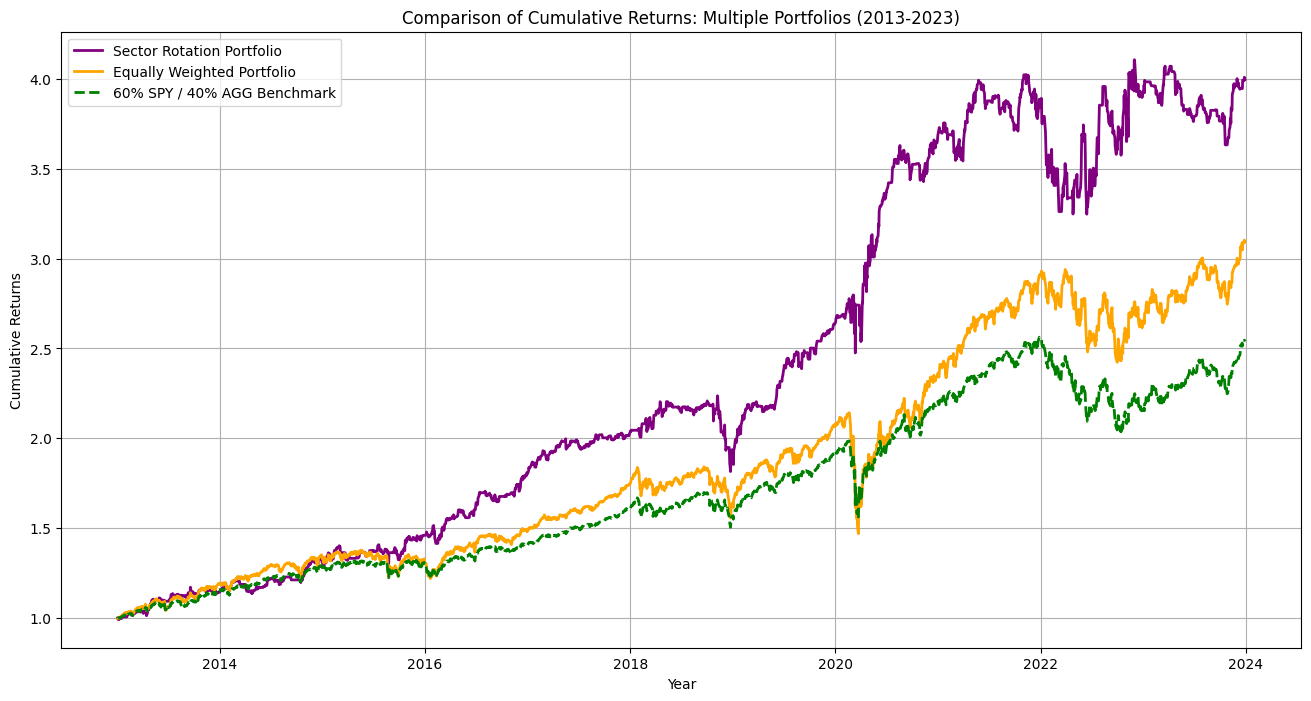

In [ ]:
# Plot the performance of all three portfolios
plt.figure(figsize=(16, 8))
plt.plot(AggressiveTechPortfolio_cumulative_returns.index, AggressiveTechPortfolio_cumulative_returns, label='Sector Rotation Portfolio', color='purple', linewidth=2)
plt.plot(equally_weighted_cumulative_returns.index, equally_weighted_cumulative_returns, label='Equally Weighted Portfolio', color='orange', linestyle='-', linewidth=2)
plt.plot(benchmark_cumulative_returns.index, benchmark_cumulative_returns, label='60% SPY / 40% AGG Benchmark', color='green', linestyle='--', linewidth=2)
# plt.plot(tech_cumulative_returns.index, tech_cumulative_returns, label='100% Tech Portfolio', color='red', linestyle='-.', linewidth=2)

plt.title('Comparison of Cumulative Returns: Multiple Portfolios (2013-2023)')
plt.xlabel('Year')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
print("Performance Metrics Comparison:\n")

print("60/40 Benchmark Metrics:")
print(f"Annual Return: {annual_return_benchmark * 100:.2f}%")
print(f"Annual Volatility: {benchmark_portfolio_returns.std() * np.sqrt(252) * 100:.2f}%")
print(f"Sharpe Ratio: {sharpe_ratio_benchmark:.2f}")
print(f"Max Drawdown: {max_drawdown_benchmark * 100:.2f}%\n")

print("Equally Weighted Portfolio Metrics:")
print(f"Annual Return: {annual_return_equally_weighted * 100:.2f}%")
print(f"Annual Volatility: {annual_volatility_equally_weighted * 100:.2f}%")
print(f"Sharpe Ratio: {sharpe_ratio_equally_weighted:.2f}")
print(f"Max Drawdown: {max_drawdown_equally_weighted * 100:.2f}%\n")

print("Sector Rotation Portfolio Metrics:")
print(f"Annual Return: {annual_return_aggressive_tech * 100:.2f}%")
print(f"Annual Volatility: {annual_volatility_aggressive_tech * 100:.2f}%")
print(f"Sharpe Ratio: {sharpe_ratio_aggressive_tech:.2f}")
print(f"Max Drawdown: {max_drawdown_aggressive_tech * 100:.2f}%\n")



Performance Metrics Comparison:

60/40 Benchmark Metrics:
Annual Return: 9.04%
Annual Volatility: 10.56%
Sharpe Ratio: 0.86
Max Drawdown: -21.72%

Equally Weighted Portfolio Metrics:
Annual Return: 11.29%
Annual Volatility: 14.17%
Sharpe Ratio: 0.80
Max Drawdown: -31.40%

Sector Rotation Portfolio Metrics:
Annual Return: 13.61%
Annual Volatility: 14.14%
Sharpe Ratio: 0.96
Max Drawdown: -19.28%



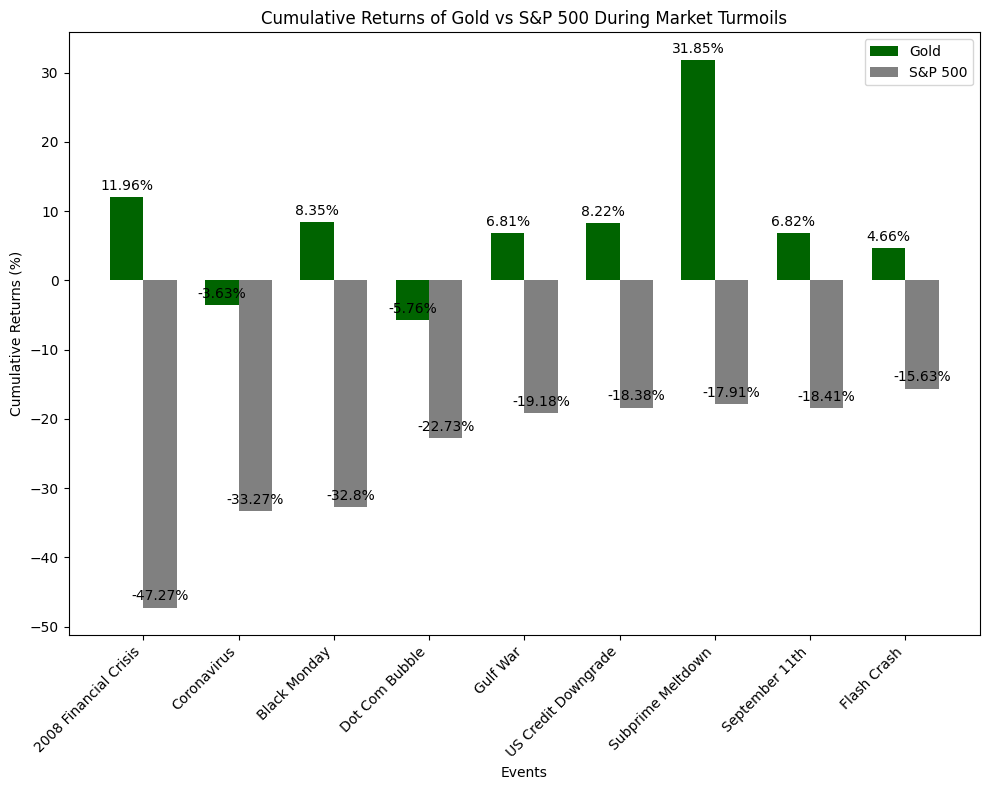

In [ ]:
# Data setup
events = ['2008 Financial Crisis', 'Coronavirus', 'Black Monday',
          'Dot Com Bubble', 'Gulf War', 'US Credit Downgrade',
          'Subprime Meltdown', 'September 11th', 'Flash Crash']
gold_returns = [11.96, -3.63, 8.35, -5.76, 6.81, 8.22, 31.85, 6.82, 4.66]
sp_returns = [-47.27, -33.27, -32.80, -22.73, -19.18, -18.38, -17.91, -18.41, -15.63]

x = np.arange(len(events))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 8))
rects1 = ax.bar(x - width/2, gold_returns, width, label='Gold', color='darkgreen')
rects2 = ax.bar(x + width/2, sp_returns, width, label='S&P 500', color='gray')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Events')
ax.set_ylabel('Cumulative Returns (%)')
ax.set_title('Cumulative Returns of Gold vs S&P 500 During Market Turmoils')
ax.set_xticks(x)
ax.set_xticklabels(events, rotation=45, ha="right")
ax.legend()

# Function to attach a label above each bar, showing its height.
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height}%',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()